In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("book.csv", encoding= 'unicode_escape')
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [3]:
data = df.iloc[:,1:]
data.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [4]:
data["Book.Title"].value_counts()

Fahrenheit 451                                                                                5
The Amber Spyglass (His Dark Materials, Book 3)                                               4
Vanished                                                                                      4
Charlie and the Chocolate Factory                                                             4
The Subtle Knife (His Dark Materials, Book 2)                                                 4
                                                                                             ..
Mothering the Mother: How a Doula Can Help You Have a Shorter, Easier, and Healthier Birth    1
Jack: Straight from the Gut                                                                   1
More Everyday Parenting: The Six-To-Nine Year Old                                             1
Baby-Sitters Island Adventure (Baby-Sitters Club Super Special, 4)                            1
The Secret Language of Dreams: A Visual 

In [5]:
books = data.rename({'User.ID': 'UserID', 'Book.Title': 'Title', 'Book.Rating': 'Rating'}, axis=1)
books.head()

,UserID,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [6]:
#number of unique users in the dataset
len(books.UserID.unique())

2182

In [7]:
len(books.Title.unique())

9659

In [8]:
books.groupby('Title')['Rating'].mean().head() #group the dataset by the title of the book and then calculate the average rating(mean of Rating) for each title

Title
 Jason, Madison &amp                                                     8.0
 Other Stories;Merril;1985;McClelland &amp                               6.0
 Repairing PC Drives &amp                                                4.0
'48                                                                      7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities    8.0
Name: Rating, dtype: float64

In [9]:
books.groupby('Title')['Rating'].mean().sort_values(ascending=False).head() #Sorting the ratings in the descending order of their average ratings

Title
Clear Light of Day                                         10.0
Substitute Teaching: A Handbook for Hassle-Free Subbing    10.0
Daughter of Camelot (Merlin's Legacy, No 6)                10.0
The Resourceful English Teacher                            10.0
Das verbotene Lied.                                        10.0
Name: Rating, dtype: float64

In [10]:
#A book can make it to the top of the above list even if only a single user has given it ten stars. 
# Therefore, the above stats can be misleading. Normally, a book which is really a good one gets a higher rating by a large number of users.
# Hence we have to find out the total number of ratings for the a book

In [11]:
books.groupby('Title')['Rating'].count().sort_values(ascending=False).head() #Gives the list of top popular books

Title
Fahrenheit 451                                     5
Vanished                                           4
Charlie and the Chocolate Factory                  4
Stardust                                           4
The Amber Spyglass (His Dark Materials, Book 3)    4
Name: Rating, dtype: int64

In [12]:
ratings_mean_count = pd.DataFrame(books.groupby('Title')['Rating'].mean()) #Creating a dataframe with the average ratings of books

In [13]:
ratings_mean_count['Rating_counts'] = pd.DataFrame(books.groupby('Title')['Rating'].count()) # Creating a column with the number of ratings of a book

In [14]:
ratings_mean_count

,Rating,Rating_counts
Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0,1
"\Well, there's your problem\: Cartoons",9.0,1
iI Paradiso Degli Orchi,7.0,1


<AxesSubplot:>

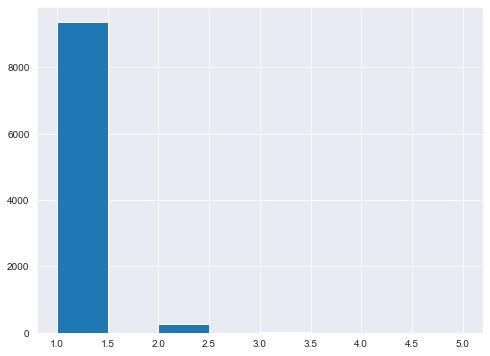

In [15]:
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating_counts'].hist(bins=8)

<AxesSubplot:>

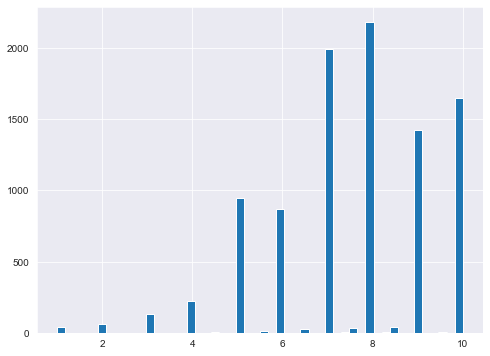

In [16]:
#Plot a histogram for average ratings of books
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

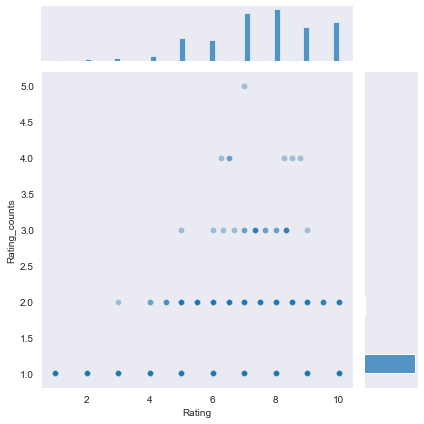

In [17]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='Rating_counts', data=ratings_mean_count, alpha=0.4)

In [18]:
user_book_rating = books.pivot_table(index='UserID', columns='Title', values='Rating').reset_index(drop=True)

In [19]:
user_book_rating

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Impute those NaNs with 0 values
user_book_rating.fillna(0, inplace=True)
user_book_rating

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
Vanished_ratings = user_book_rating['Vanished']
Vanished_ratings

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2177    0.0
2178    0.0
2179    0.0
2180    0.0
2181    0.0
Name: Vanished, Length: 2182, dtype: float64

In [22]:
books_like_vanished = user_book_rating.corrwith(Vanished_ratings)

corr_vanished = pd.DataFrame(books_like_vanished, columns=['Correlation'])
corr_vanished.dropna(inplace=True)
corr_vanished.head()

,Correlation
Title,
"Jason, Madison &amp",-0.000904
Other Stories;Merril;1985;McClelland &amp,-0.000904
Repairing PC Drives &amp,-0.000904
'48,-0.000904
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000904


In [23]:
corr_vanished.sort_values('Correlation', ascending=False).head(5)

,Correlation
Title,
Vanished,1.000000
Last Summer at Barebones,0.454464
The LAST PICTURE SHOW : A Novel,0.454464
Kits Law,0.454464
Chasing Cezanne,0.454464


In [24]:
corr_vanished = corr_vanished.join(ratings_mean_count['Rating_counts'])
corr_vanished.head()

,Correlation,Rating_counts
Title,,
"Jason, Madison &amp",-0.000904,1
Other Stories;Merril;1985;McClelland &amp,-0.000904,1
Repairing PC Drives &amp,-0.000904,1
'48,-0.000904,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000904,1


In [25]:
#From the above outputs you can see that the books that have high correlation with "Vanished" are very less or not well known. 
#This shows that correlation alone is not a good metric for similarity because there can be a user who read "Vanished" and read only one other book and rated both of them high.
#A solution to this problem is to retrieve only those correlated movies that have at least more than 3 ratings(as max avg. rating count is 5 for this dataset).

In [26]:
corr_vanished[corr_vanished['Rating_counts']>3].sort_values('Correlation', ascending=False) 

,Correlation,Rating_counts
Title,,
Vanished,1.000000,4
Fahrenheit 451,0.224660,5
"The Amber Spyglass (His Dark Materials, Book 3)",-0.001733,4
Ender's Game (Ender Wiggins Saga (Paperback)),-0.001772,4
Charlie and the Chocolate Factory,-0.001784,4
"The Subtle Knife (His Dark Materials, Book 2)",-0.001796,4
Stardust,-0.001801,4


# Analysing as discussed in the class

In [27]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

user_sim = 1 - pairwise_distances(user_book_rating.values,metric='cosine')

In [28]:
?pairwise_distances

Signature:
pairwise_distances(
    X,
    Y=None,
    metric='euclidean',
    *,
    n_jobs=None,
    force_all_finite=True,
    **kwds,
)
Docstring:
Compute the distance matrix from a vector array X and optional Y.

This method takes either a vector array or a distance matrix, and returns
a distance matrix. If the input is a vector array, the distances are
computed. If the input is a distances matrix, it is returned instead.

This method provides a safe way to take a distance matrix as input, while
preserving compatibility with many other algorithms that take a vector
array.

If Y is given (default is None), then the returned matrix is the pairwise
distance between the arrays from both X and Y.

Valid values for metric are:

- From scikit-learn: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',
  'manhattan']. These metrics support sparse matrix
  inputs.
  ['nan_euclidean'] but it does not yet support sparse matrices.

- From scipy.spatial.distance: ['braycurtis', 'canberra', 'chebysh

In [29]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
#Set the index and column names to user ids 
user_sim_df.index = books.UserID.unique()
user_sim_df.columns = books.UserID.unique()

In [32]:
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [33]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [34]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [35]:
books[(books['UserID']==276729) | (books['UserID']==276726)]

,UserID,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


In [36]:
user_1=books[books['UserID']==276726]

In [37]:
user_2=books[books['UserID']==276744]

In [38]:
user_1.Title

0    Classical Mythology
Name: Title, dtype: object

In [39]:
user_2.Title

5    The Kitchen God's Wife
Name: Title, dtype: object

In [40]:
pd.merge(user_1,user_2,on='Title',how='outer')

,UserID_x,Title,Rating_x,UserID_y,Rating_y
0,276726.0,Classical Mythology,5.0,NaN,NaN
1,NaN,The Kitchen God's Wife,NaN,276744.0,7.0
